In [54]:
import pandas as pd
import datetime
%matplotlib inline 
import numpy as np
import panel as pn
from panel.interact import interact
from panel import widgets
import hvplot.pandas
pn.extension()
import plotly.express as px
pn.extension("plotly")

In [55]:
def vehicle_data():
    vehicle_data = pd.read_csv('Mobility.csv',index_col='Unnamed: 1')
    vehicle_data.drop(columns ='Unnamed: 0', inplace = True)
    vehicle_data.rename(columns ={'Unnamed: 2':'Vehicle-Distance Travelled (Billion Miles)'},inplace=True)
    vehicle_data.index.rename('Date', inplace = True)
    vehicle_data.drop(['Date'],inplace = True)
    vehicle_data.replace(',','', regex=True, inplace=True)
    vehicle_data['Vehicle-Distance Travelled (Billion Miles)'] =pd.to_numeric(vehicle_data['Vehicle-Distance Travelled (Billion Miles)'])
    return vehicle_data.plot()
    

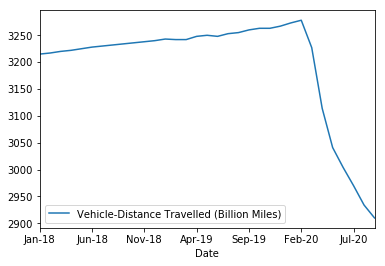

In [56]:
vehicle_data()

Column
    [0] Column()
    [1] Row
        [0] Str(AxesSubplot, name='interactive02459')

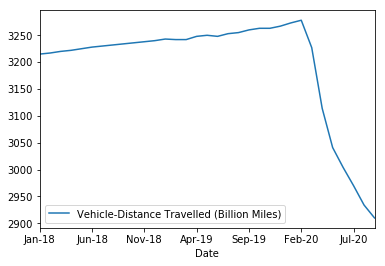

In [57]:
interact(vehicle_data)

In [58]:
def mobility_data():
    mobility_data = pd.read_csv('2020_US_Region_Mobility_Report.csv', index_col = 'date', parse_dates = True, infer_datetime_format = True)
    mobility_data['sub_region_1'].fillna(value ='ALL', inplace=True)
    nan_filter = mobility_data["sub_region_2"].isna()
    mobility_data = mobility_data[nan_filter]
    mobility_data.reset_index()
    mobility_data = mobility_data.rename(
    columns ={
    'retail_and_recreation_percent_change_from_baseline':'Retail and Recreation',
    'grocery_and_pharmacy_percent_change_from_baseline':'Grocery and Pharmacy',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'sub_region_1':'State'}) 
    return mobility_data.hvplot.line(x ='date', y ='Retail and Recreation', groupby ='State')
    
    
    


In [59]:
 mobility_data()

:DynamicMap   [State]
   :Curve   [date]   (Retail and Recreation)

In [60]:
interact(mobility_data)

Column
    [0] Column()
    [1] Row
        [0] Row(name='interactive02734')
            [0] HoloViews(DynamicMap, name='interactive02734')
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='State', options=['ALL', 'Alabama', ...], value='ALL', width=250)
                [1] VSpacer()

Column
    [0] Column
        [0] Column()
        [1] Row
            [0] Row(name='interactive03821')
                [0] HoloViews(DynamicMap, name='interactive03821')
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='State', options=['ALL', 'Alabama', ...], value='ALL', width=250)
                    [1] VSpacer()
    [1] Column
        [0] Column()
        [1] Row
            [0] Str(AxesSubplot, name='interactive03867')

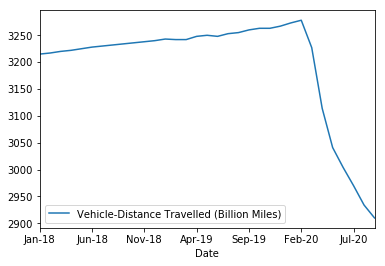

In [65]:
pane = pn.Column(mobility_data,vehicle_data)
pane